In [1]:
import jsonpickle
import numpy as np
from copulas.multivariate import Multivariate
import matplotlib.pyplot as plt
from scipy.stats import expon
import pandas as pd
import random
import utils

In [2]:
parameter_file_name = 'best_free_parameters_from_turbo.json'

In [3]:
free_parameters = jsonpickle.decode(open(parameter_file_name).read())

In [6]:
free_parameters

{'beta_1a': 13.240146247691937,
 'beta_1b': 6.0611561707827635,
 'beta_2a': 17.264634242739348,
 'beta_2b': 16.308095802592923,
 'beta_3a': 17.429445943501246,
 'beta_3b': 0.4849237009955849,
 'beta_4a': 8.75352311747996,
 'beta_4b': 14.30528548039063,
 'beta_5a': 2.030420251626473,
 'beta_5b': 15.825868806360944,
 'beta_6a': 2.356453446481836,
 'beta_6b': 16.934984154176146,
 'cov_para_1': -0.1725935860515273,
 'cov_para_10': -0.42470573963458785,
 'cov_para_11': 0.4817858483325731,
 'cov_para_12': 0.6984384614270537,
 'cov_para_13': -0.09017306629297728,
 'cov_para_14': 0.1763455716380583,
 'cov_para_15': 0.1279298618899588,
 'cov_para_2': 0.2778953764683688,
 'cov_para_3': -0.4070086152477583,
 'cov_para_4': 0.4280730491889221,
 'cov_para_5': -0.5919709154396812,
 'cov_para_6': 0.02381335401401985,
 'cov_para_7': 0.480915067467374,
 'cov_para_8': 0.5193529635141828,
 'cov_para_9': 0.7412986234164823,
 'lambda_expon_1': 3.034929389294935,
 'lambda_expon_2': 0.21217788092528464,
 'lam

In [7]:
free_para1 = free_parameters['cov_para_1']
free_para2 = free_parameters['cov_para_2']
free_para3 = free_parameters['cov_para_3']
free_para4 = free_parameters['cov_para_4']
free_para5 = free_parameters['cov_para_5']
free_para6 = free_parameters['cov_para_6']
free_para7 = free_parameters['cov_para_7']
free_para8 = free_parameters['cov_para_8']
free_para9 = free_parameters['cov_para_9']
free_para10 = free_parameters['cov_para_10']
free_para11 = free_parameters['cov_para_11']
free_para12 = free_parameters['cov_para_12']
free_para13 = free_parameters['cov_para_13']
free_para14 = free_parameters['cov_para_14']
free_para15 = free_parameters['cov_para_15']

diag_1 = 1
diag_2 = np.sqrt(1-free_para1**2)
if (1-free_para2**2-free_para3**2)<0:
    diag_3 = np.sqrt(np.abs(1-free_para2**2-free_para3**2))
else:
    diag_3 = np.sqrt(1-free_para2**2-free_para3**2)

if (1-free_para4**2-free_para5**2-free_para6**2)<0:
    diag_4 = np.sqrt(np.abs(1-free_para4**2-free_para5**2-free_para6**2))
else:
    diag_4 = np.sqrt(1-free_para4**2-free_para5**2-free_para6**2)

if (1-free_para7**2-free_para8**2-free_para9**2-free_para10**2)<0:
    diag_5 = np.sqrt(np.abs(1-free_para7**2-free_para8**2-free_para9**2-free_para10**2))
else:
    diag_5 = np.sqrt(1-free_para7**2-free_para8**2-free_para9**2-free_para10**2)

if (1-free_para11**2-free_para12**2-free_para13**2-free_para14**2-free_para15**2)<0:
    diag_6 = np.sqrt(np.abs(1-free_para11**2-free_para12**2-free_para13**2-free_para14**2-free_para15**2))
else:
    diag_6 = np.sqrt(1-free_para11**2-free_para12**2-free_para13**2-free_para14**2-free_para15**2)


lower_triangular_matrix = np.asarray([[diag_1,0,0,0,0,0],
                        [free_para1,diag_2,0,0,0,0],
                        [free_para2,free_para3,diag_3,0,0,0],
                        [free_para4,free_para5,free_para6,diag_4,0,0],
                        [free_para7,free_para8,free_para9,free_para10,diag_5,0],
                        [free_para11,free_para12,free_para13,free_para14,free_para15,diag_6]])


cov_matrix = lower_triangular_matrix@lower_triangular_matrix.transpose()


#now, define the marginal distribution of the gaussian copula
univerates = [{'loc': 0,
'scale': 1,
'a': free_parameters['beta_1a'],
'b': free_parameters['beta_1b'],
'type': 'copulas.univariate.beta.BetaUnivariate'},
{'loc': 0,
'scale': 1,
'a': free_parameters['beta_2a'],
'b': free_parameters['beta_2b'],
'type': 'copulas.univariate.beta.BetaUnivariate'},
{'loc': 0,
'scale': 1,
'a': free_parameters['beta_3a'],
'b': free_parameters['beta_3b'],
'type': 'copulas.univariate.beta.BetaUnivariate'},
{'loc': 0,
'scale': 1,
'a': free_parameters['beta_4a'],
'b': free_parameters['beta_4b'],
'type': 'copulas.univariate.beta.BetaUnivariate'},
{'loc': 0,
'scale': 1,
'a': free_parameters['beta_5a'],
'b': free_parameters['beta_5b'],
'type': 'copulas.univariate.beta.BetaUnivariate'},
{'loc': 0,
'scale': 1,
'a': free_parameters['beta_6a'],
'b': free_parameters['beta_6b'],
'type': 'copulas.univariate.beta.BetaUnivariate'}]


#now, we construct the gaussian copula
copula_parameters = {}
copula_parameters['covariance'] = cov_matrix
copula_parameters['univariates'] = univerates
copula_parameters['type'] = 'copulas.multivariate.gaussian.GaussianMultivariate'
copula_parameters['columns'] = [0,1,2,3,4,5]

new_dist = Multivariate.from_dict(copula_parameters)

In [8]:
cov_matrix

array([[ 1.        , -0.17259359,  0.27789538,  0.42807305,  0.48091507,
         0.48178585],
       [-0.17259359,  1.        , -0.44886365, -0.65696994,  0.42855624,
         0.60480393],
       [ 0.27789538, -0.44886365,  1.        ,  0.38061739,  0.56728568,
        -0.22884628],
       [ 0.42807305, -0.65696994,  0.38061739,  1.        , -0.37376855,
        -0.08901357],
       [ 0.48091507,  0.42855624,  0.56728568, -0.37376855,  1.46181083,
         0.51416766],
       [ 0.48178585,  0.60480393, -0.22884628, -0.08901357,  0.51416766,
         1.        ]])

In [9]:
#let's sample and plot the marginal distribution
samples = new_dist.sample(5000)

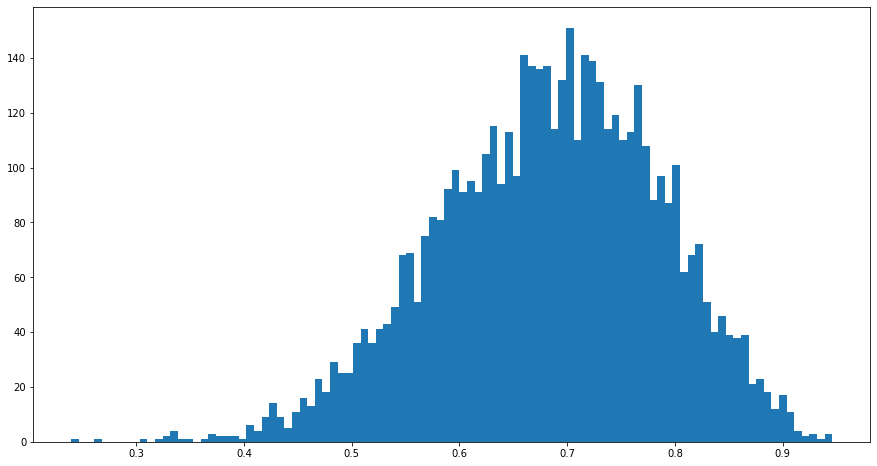

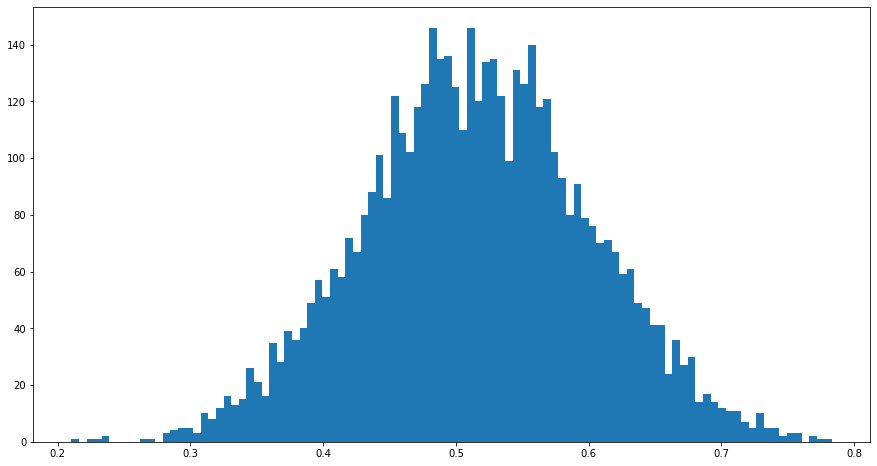

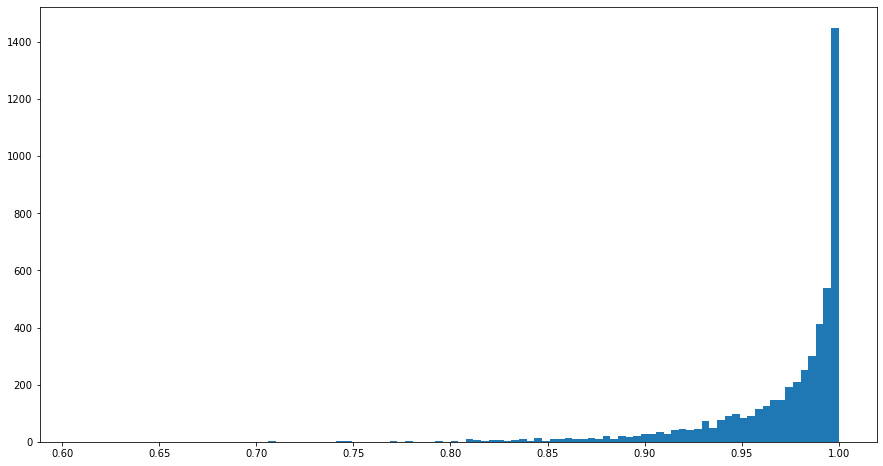

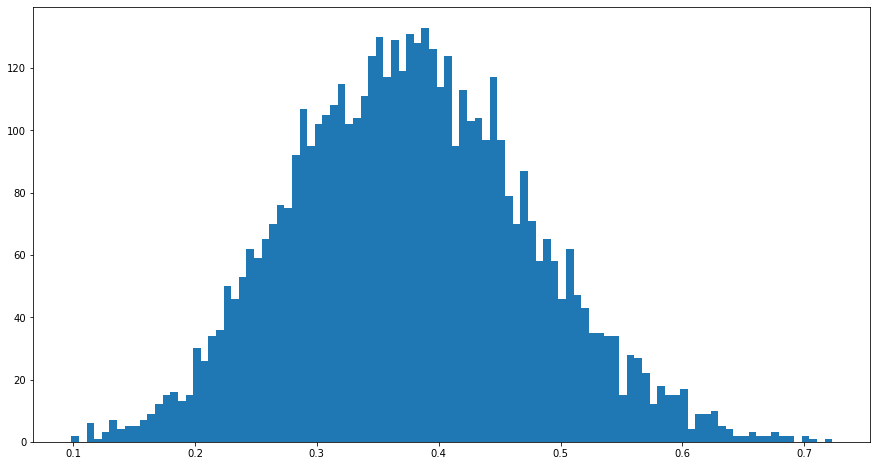

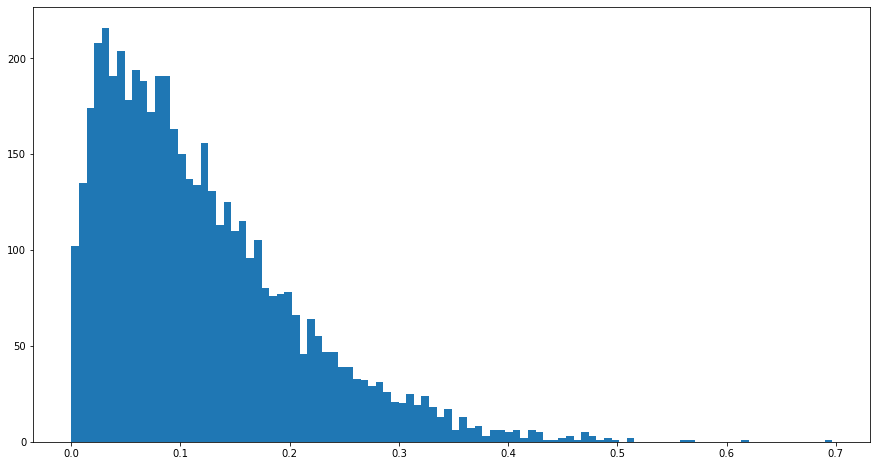

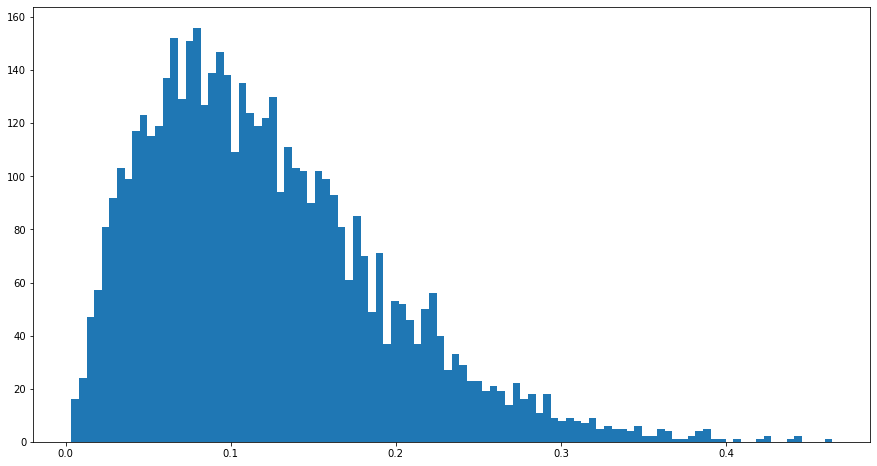

In [10]:
plt.rcParams["figure.figsize"] = (15,8)

for index in range(0,6):
    plt.hist(samples[index],bins = 100)
    plt.show()

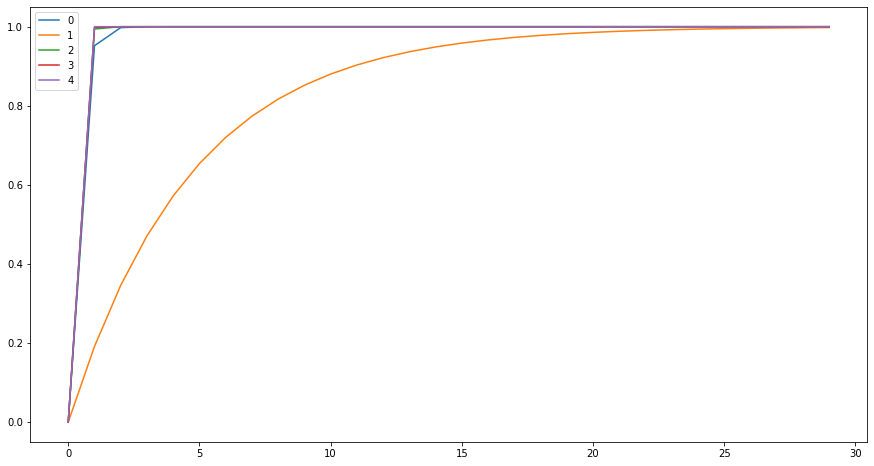

In [11]:
#other parameters needed for transforming the features
lambda_expon_1 = free_parameters['lambda_expon_1']
lambda_expon_2 = free_parameters['lambda_expon_2']
lambda_expon_3 = free_parameters['lambda_expon_3']
lambda_expon_4 = free_parameters['lambda_expon_4']
lambda_expon_5 = free_parameters['lambda_expon_5']
lambda_expons = [lambda_expon_1,lambda_expon_2,lambda_expon_3,lambda_expon_4,lambda_expon_5]


for line_index in range(0,len(lambda_expons)):

    x_plot = []
    y_plot = []
    
    for fake_days in range(0,30):
        r = expon.cdf(fake_days,scale = 1.0/lambda_expons[line_index])
        y_plot.append(r)
        x_plot.append(fake_days)

    plt.plot(x_plot,y_plot,label = str(line_index))

plt.legend()
plt.show()

In [34]:
import trading_vix_non_random_seed
env = trading_vix_non_random_seed.trading_vix(seed_index = 500)

In [35]:
env.index_feature_dataframe

,vix_price_adj_close,vix_adj_close,mv_ratio,days_since_5,days_since_6,days_since_7
0,44.680000,10.390000,4.723398,15,15,148
1,43.720001,10.160000,4.637249,16,16,149
2,44.320000,10.700000,4.881131,17,17,150
3,44.799999,11.460000,5.196037,1,18,151
4,43.279999,10.420000,4.737496,2,19,152
...,...,...,...,...,...,...
995,8.190000,20.670000,5.061708,3,7,80
996,8.080000,20.150000,4.940175,4,8,81
997,7.710000,18.400000,4.546979,5,9,82
998,7.710000,18.840000,4.680220,6,10,83


In [36]:
visualize_time_length = 200

price_history = []
vix_history = []
action_history1 = np.zeros((1,visualize_time_length+1))
action_history2 = np.zeros((1,visualize_time_length+1))
portfolio_value_history = []
transaction_value_history = []

price,current_feature,portfolio_value,current_vix = env.reset(return_price=True)
price_history.append(price)
portfolio_value_history.append(portfolio_value)
transaction_value_history.append(0)
vix_history.append(current_vix)

for time_index in range(0,visualize_time_length):
    
    #compute an action given current observation
    transformed_features = []
    for feature_index in range(len(lambda_expons)):
        transformation = expon.cdf(current_feature[feature_index,0],scale = 1.0/lambda_expons[feature_index])
        min_transformation = 0.1
        transformation = min_transformation*np.exp(np.log(1.0/min_transformation)*transformation)
        transformed_features.append(transformation)
    transformed_features = np.asarray(transformed_features)
    transformed_features = np.reshape(transformed_features,(1,-1))
    holding_position = current_feature[-1,:][0]
    if holding_position<0:
        print('holding is less than 0, there is some problem and the holding position is',holding_position)
    if holding_position>1:
        print('holding is greater than 1, there is some problem and the holding position is',holding_position)
    min_transformed_holding = 0.1
    transformed_holding = min_transformed_holding*np.exp(np.log(1.0/min_transformed_holding)*holding_position)
    transformed_holding = np.reshape(transformed_holding,(1,1))
    data_point_for_df = np.concatenate((transformed_features,transformed_holding),axis = 1)

    assert data_point_for_df.shape[1] == 6
    data_point_for_copula = pd.DataFrame(data_point_for_df)
    action = new_dist.cdf(data_point_for_copula)
    
    #apply the action to the environment
    price, current_feature,execute_action,need_to_buy,need_to_sell,portfolio_value,transaction_value,\
    current_vix = env.step(action,return_price=True)

#     if execute_action and need_to_buy:
#         print('buy')
#         print('time index is',time_index)
#     if execute_action and need_to_sell:
#         print('sell')
#         print('time index is',time_index)
    
    #record price and action
    price_history.append(price)
    if execute_action:
        if need_to_buy:
            action_history1[0,time_index+1] = 2 #add 1 because of initial price observation
            #print('record buy action')
        if need_to_sell:
            action_history1[0,time_index+1] = 1
            #print('record sell action')

    action_history2[0,time_index+1] = action 
    portfolio_value_history.append(portfolio_value)
    transaction_value_history.append(transaction_value)
    vix_history.append(current_vix)

In [37]:
print(action_history1.shape)
print(action_history2.shape)
print(len(price_history))
print(len(portfolio_value_history))
print(len(transaction_value_history))
print(len(vix_history))

(1, 201)
(1, 201)
201
201
201
201


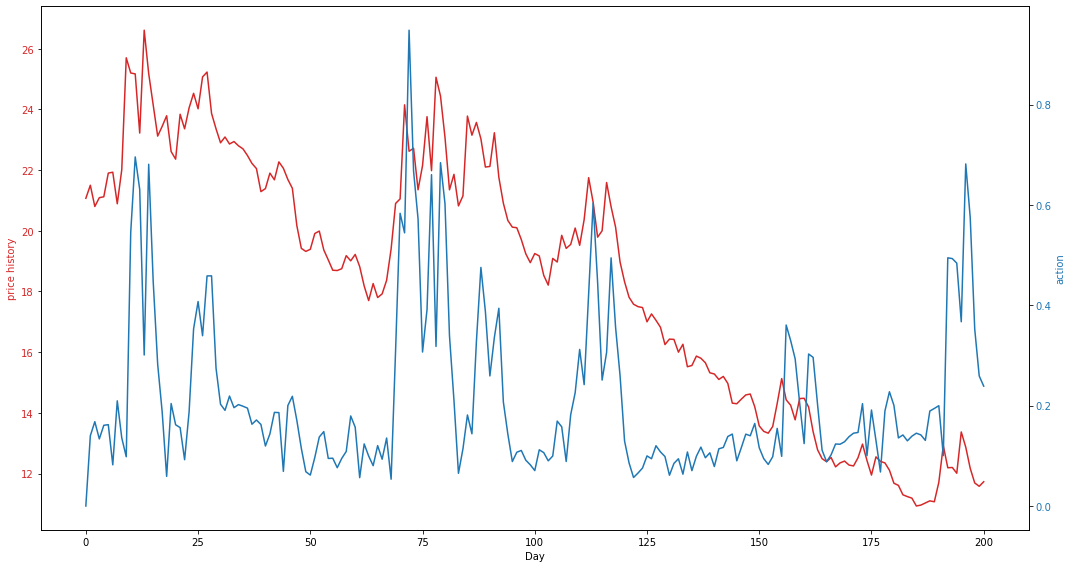

In [38]:
plt.rcParams["figure.figsize"] = (15,8)

fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('Day')
ax1.set_ylabel('price history', color=color)
ax1.plot(price_history, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('action', color=color)  # we already handled the x-label with ax1
ax2.plot(action_history2[0,:], color=color)
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

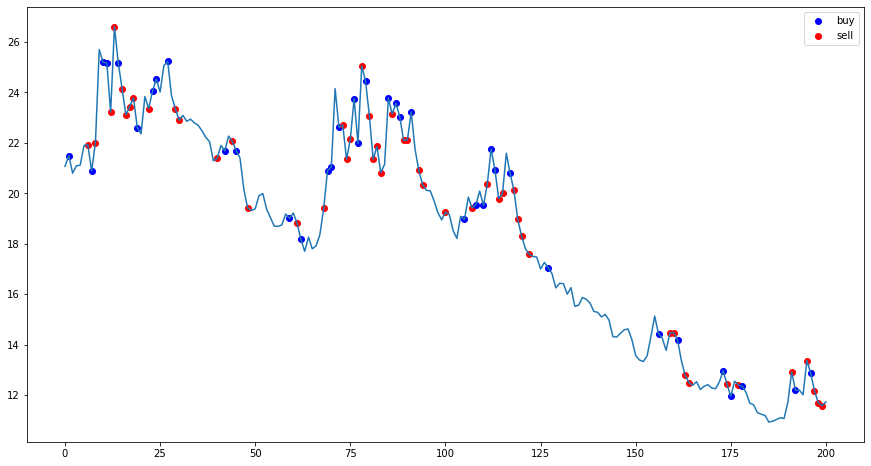

In [39]:
already_plotted_sell_legend = False
already_plotted_buy_legend = False

plt.plot(price_history)
for time_index in range(0,len(action_history1[0])):

    if action_history1[0,time_index]==2:
        #print('the buy price is',price_history[time_index])
        if already_plotted_sell_legend == False:
            plt.scatter(time_index,price_history[time_index],color = 'b',label = 'buy')
            already_plotted_sell_legend = True
        else:
            plt.scatter(time_index,price_history[time_index],color = 'b')

    elif action_history1[0,time_index]==1:
        #print('the sell price is',price_history[time_index])
        #print(' ')
        if already_plotted_buy_legend == False:
            plt.scatter(time_index,price_history[time_index],color = 'r',label = 'sell')
            already_plotted_buy_legend = True
        else:
            plt.scatter(time_index,price_history[time_index],color = 'r')
plt.legend()
plt.show()

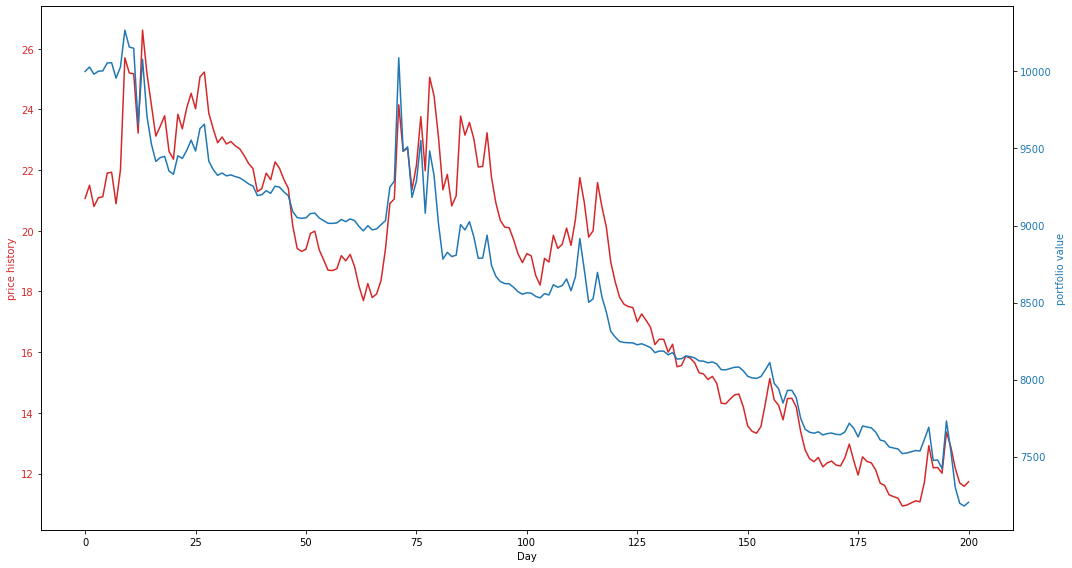

In [40]:
plt.rcParams["figure.figsize"] = (15,8)

fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('Day')
ax1.set_ylabel('price history', color=color)
ax1.plot(price_history, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('portfolio value', color=color)  # we already handled the x-label with ax1
ax2.plot(portfolio_value_history, color=color)
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

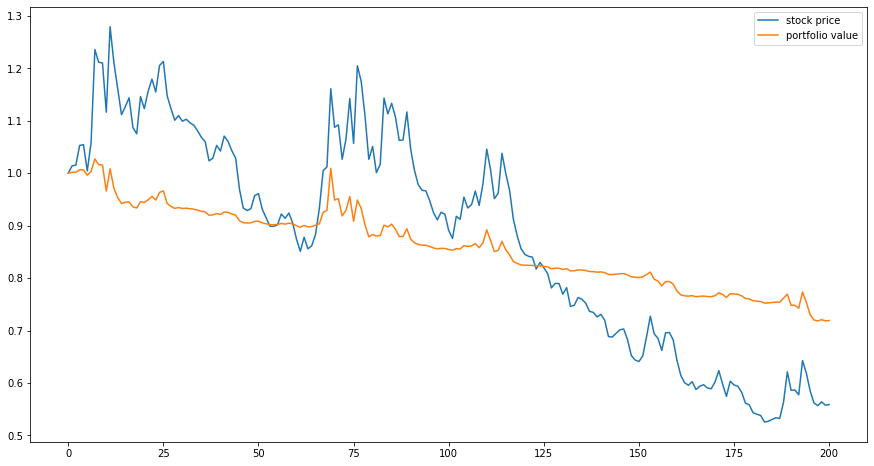

In [46]:
plt.plot(np.asarray(price_history)/price_history[0],label = 'stock price')
plt.plot(np.asarray(portfolio_value_history)/portfolio_value_history[0],label = 'portfolio value')
plt.legend()
plt.show()

In [41]:
df = pd.DataFrame()
df['suggested stock-total portfolio ratio'] = action_history2[0,:][0:35].tolist()
df['transaction_value'] = transaction_value_history[0:35]
df['execute_action'] = action_history1[0,:][0:35].tolist()
df

,suggested stock-total portfolio ratio,transaction_value,execute_action
0,0.000000,0.000000,0.0
1,0.140055,1400.553365,2.0
2,0.168058,256.244894,0.0
3,0.133704,47.964135,0.0
4,0.160862,206.946963,0.0
5,0.162142,218.076906,0.0
6,0.082052,630.676397,1.0
7,0.209637,1281.989928,2.0
8,0.135825,655.869828,1.0
9,0.098198,440.010247,0.0


In [47]:
#i also want to make sure the program is at a large global minimum
#i will try to perturb the parameters and see if the algorithm still performs well

total_returns = []

for seed_index in range(0,10):
    
    print('this is iteration',seed_index)
    
    #first, perturb the parameters
    perturbed_parameters = {}
    for key in free_parameters.keys():
        var_value = free_parameters[key]
        perturbed_parameters[key] = var_value*(random.uniform(-0.1, 0.1)+1)
        
        
    free_para1 = free_parameters['cov_para_1']
    free_para2 = free_parameters['cov_para_2']
    free_para3 = free_parameters['cov_para_3']
    free_para4 = free_parameters['cov_para_4']
    free_para5 = free_parameters['cov_para_5']
    free_para6 = free_parameters['cov_para_6']
    free_para7 = free_parameters['cov_para_7']
    free_para8 = free_parameters['cov_para_8']
    free_para9 = free_parameters['cov_para_9']
    free_para10 = free_parameters['cov_para_10']
    free_para11 = free_parameters['cov_para_11']
    free_para12 = free_parameters['cov_para_12']
    free_para13 = free_parameters['cov_para_13']
    free_para14 = free_parameters['cov_para_14']
    free_para15 = free_parameters['cov_para_15']

    diag_1 = 1
    diag_2 = np.sqrt(1-free_para1**2)
    if (1-free_para2**2-free_para3**2)<0:
        diag_3 = np.sqrt(np.abs(1-free_para2**2-free_para3**2))
    else:
        diag_3 = np.sqrt(1-free_para2**2-free_para3**2)

    if (1-free_para4**2-free_para5**2-free_para6**2)<0:
        diag_4 = np.sqrt(np.abs(1-free_para4**2-free_para5**2-free_para6**2))
    else:
        diag_4 = np.sqrt(1-free_para4**2-free_para5**2-free_para6**2)

    if (1-free_para7**2-free_para8**2-free_para9**2-free_para10**2)<0:
        diag_5 = np.sqrt(np.abs(1-free_para7**2-free_para8**2-free_para9**2-free_para10**2))
    else:
        diag_5 = np.sqrt(1-free_para7**2-free_para8**2-free_para9**2-free_para10**2)

    if (1-free_para11**2-free_para12**2-free_para13**2-free_para14**2-free_para15**2)<0:
        diag_6 = np.sqrt(np.abs(1-free_para11**2-free_para12**2-free_para13**2-free_para14**2-free_para15**2))
    else:
        diag_6 = np.sqrt(1-free_para11**2-free_para12**2-free_para13**2-free_para14**2-free_para15**2)


    lower_triangular_matrix = np.asarray([[diag_1,0,0,0,0,0],
                            [free_para1,diag_2,0,0,0,0],
                            [free_para2,free_para3,diag_3,0,0,0],
                            [free_para4,free_para5,free_para6,diag_4,0,0],
                            [free_para7,free_para8,free_para9,free_para10,diag_5,0],
                            [free_para11,free_para12,free_para13,free_para14,free_para15,diag_6]])


    cov_matrix = lower_triangular_matrix@lower_triangular_matrix.transpose()


    #now, define the marginal distribution of the gaussian copula
    univerates = [{'loc': 0,
    'scale': 1,
    'a': free_parameters['beta_1a'],
    'b': free_parameters['beta_1b'],
    'type': 'copulas.univariate.beta.BetaUnivariate'},
    {'loc': 0,
    'scale': 1,
    'a': free_parameters['beta_2a'],
    'b': free_parameters['beta_2b'],
    'type': 'copulas.univariate.beta.BetaUnivariate'},
    {'loc': 0,
    'scale': 1,
    'a': free_parameters['beta_3a'],
    'b': free_parameters['beta_3b'],
    'type': 'copulas.univariate.beta.BetaUnivariate'},
    {'loc': 0,
    'scale': 1,
    'a': free_parameters['beta_4a'],
    'b': free_parameters['beta_4b'],
    'type': 'copulas.univariate.beta.BetaUnivariate'},
    {'loc': 0,
    'scale': 1,
    'a': free_parameters['beta_5a'],
    'b': free_parameters['beta_5b'],
    'type': 'copulas.univariate.beta.BetaUnivariate'},
    {'loc': 0,
    'scale': 1,
    'a': free_parameters['beta_6a'],
    'b': free_parameters['beta_6b'],
    'type': 'copulas.univariate.beta.BetaUnivariate'}]


    #now, we construct the gaussian copula
    copula_parameters = {}
    copula_parameters['covariance'] = cov_matrix
    copula_parameters['univariates'] = univerates
    copula_parameters['type'] = 'copulas.multivariate.gaussian.GaussianMultivariate'
    copula_parameters['columns'] = [0,1,2,3,4,5]

    new_dist = Multivariate.from_dict(copula_parameters)
    
    #simulate trading
    env = trading_vix_non_random_seed.trading_vix(seed_index+100)
    
    
    visualize_time_length = 200

    price_history = []
    vix_history = []
    action_history1 = np.zeros((1,visualize_time_length+1))
    action_history2 = np.zeros((1,visualize_time_length+1))
    portfolio_value_history = []
    transaction_value_history = []

    price,current_feature,portfolio_value,current_vix = env.reset(return_price=True)
    price_history.append(price)
    portfolio_value_history.append(portfolio_value)
    transaction_value_history.append(0)
    vix_history.append(current_vix)

    for time_index in range(0,visualize_time_length):

        #compute an action given current observation
        transformed_features = []
        for feature_index in range(len(lambda_expons)):
            transformation = expon.cdf(current_feature[feature_index,0],scale = 1.0/lambda_expons[feature_index])
            min_transformation = 0.1
            transformation = min_transformation*np.exp(np.log(1.0/min_transformation)*transformation)
            transformed_features.append(transformation)
        transformed_features = np.asarray(transformed_features)
        transformed_features = np.reshape(transformed_features,(1,-1))
        #holding_position = expit(current_feature[-1,:][0])
        holding_position = current_feature[-1,:][0]
        if holding_position<0:
            print('holding is less than 0, there is some problem and the holding position is',holding_position)
        if holding_position>1:
            print('holding is greater than 1, there is some problem and the holding position is',holding_position)
        min_transformed_holding = 0.1
        transformed_holding = min_transformed_holding*np.exp(np.log(1.0/min_transformed_holding)*holding_position)
        transformed_holding = np.reshape(transformed_holding,(1,1))
        data_point_for_df = np.concatenate((transformed_features,transformed_holding),axis = 1)

        assert data_point_for_df.shape[1] == 6
        data_point_for_copula = pd.DataFrame(data_point_for_df)
        action = new_dist.cdf(data_point_for_copula)

        #apply the action to the environment
        price, current_feature,execute_action,need_to_buy,need_to_sell,portfolio_value,transaction_value,\
        current_vix = env.step(action,return_price=True)

    #     if execute_action and need_to_buy:
    #         print('buy')
    #         print('time index is',time_index)
    #     if execute_action and need_to_sell:
    #         print('sell')
    #         print('time index is',time_index)

        #record price and action
        price_history.append(price)
        if execute_action:
            if need_to_buy:
                action_history1[0,time_index+1] = 2 #add 1 because of initial price observation
                #print('record buy action')
            if need_to_sell:
                action_history1[0,time_index+1] = 1
                #print('record sell action')

        action_history2[0,time_index+1] = action 
        portfolio_value_history.append(portfolio_value)
        transaction_value_history.append(transaction_value)
        vix_history.append(current_vix)
        
    total_returns.append(portfolio_value_history[-1])

this is iteration 0
this is iteration 1
this is iteration 2
this is iteration 3
this is iteration 4
this is iteration 5
this is iteration 6
this is iteration 7
this is iteration 8
this is iteration 9


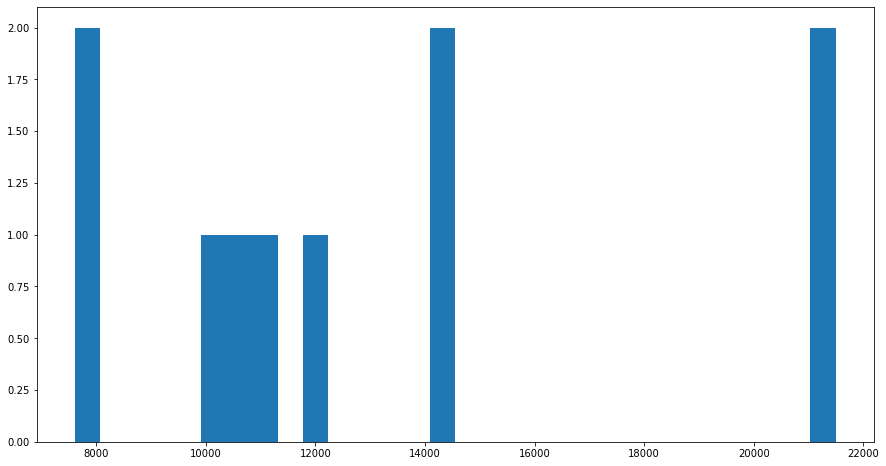

In [48]:
plt.hist(total_returns,bins = 30)
plt.show()